# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t120_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,140.236946,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
0,909.0,1142.0,1338.0,1536.0,1584.0,1769.0,1864.0,2051.0,2113.0,2262.0,...,3394.0,3549.0,3419.0,3475.0,3370.0,3513.0,3602.0,3506.0,3492.0,3400.0
1,882.0,1137.0,1346.0,1490.0,1681.0,1807.0,1851.0,2003.0,2199.0,2275.0,...,3489.0,3520.0,3560.0,3511.0,3601.0,3561.0,3560.0,3537.0,3563.0,3501.0
2,978.0,1159.0,1471.0,1598.0,1873.0,1923.0,1927.0,2072.0,2258.0,2313.0,...,3672.0,3749.0,3815.0,3641.0,3775.0,3706.0,3584.0,3632.0,3469.0,3708.0
3,906.0,1166.0,1305.0,1656.0,1804.0,1865.0,2081.0,2122.0,2192.0,2494.0,...,3729.0,3697.0,3788.0,3734.0,3759.0,3694.0,3604.0,3740.0,3668.0,3696.0
4,1045.0,1176.0,1483.0,1587.0,1887.0,1963.0,2112.0,2146.0,2482.0,2546.0,...,3856.0,3713.0,3902.0,3790.0,3843.0,3828.0,3665.0,3804.0,3839.0,3756.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,597.0,794.0,818.0,974.0,1098.0,1100.0,1204.0,1137.0,1326.0,1343.0,...,1596.0,1622.0,1647.0,1553.0,1588.0,1488.0,1652.0,1524.0,1593.0,1604.0
1232,574.0,742.0,849.0,917.0,997.0,1149.0,1193.0,1183.0,1314.0,1355.0,...,1561.0,1644.0,1521.0,1515.0,1657.0,1597.0,1610.0,1647.0,1553.0,1627.0
1233,608.0,744.0,922.0,979.0,1072.0,1095.0,1127.0,1194.0,1283.0,1427.0,...,1582.0,1569.0,1553.0,1562.0,1575.0,1606.0,1622.0,1554.0,1646.0,1643.0
1234,580.0,720.0,876.0,960.0,1115.0,1053.0,1193.0,1149.0,1247.0,1371.0,...,1535.0,1635.0,1629.0,1651.0,1594.0,1611.0,1595.0,1572.0,1650.0,1629.0


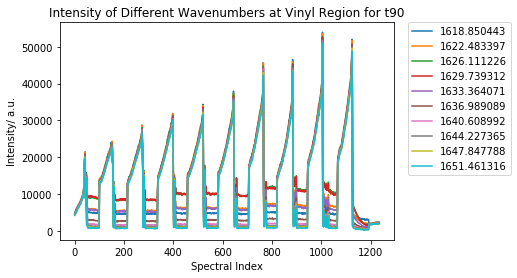

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t90')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1629.739312'] --> When using loc.
df.columns.get_loc('1629.739312') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.739312'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

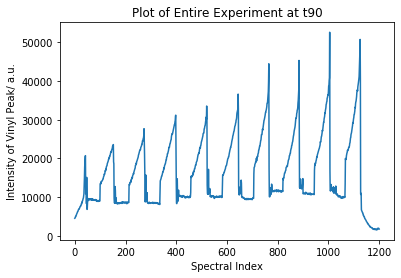

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:1200,'1629.739312'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t90')
plt.show()

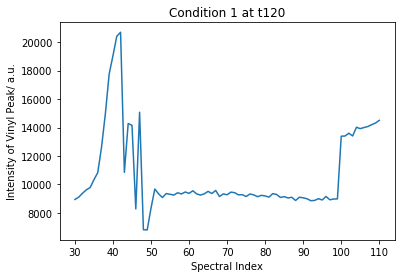

In [6]:
# Condition
df.loc[30:110,'1629.739312'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 at t120')
plt.show()

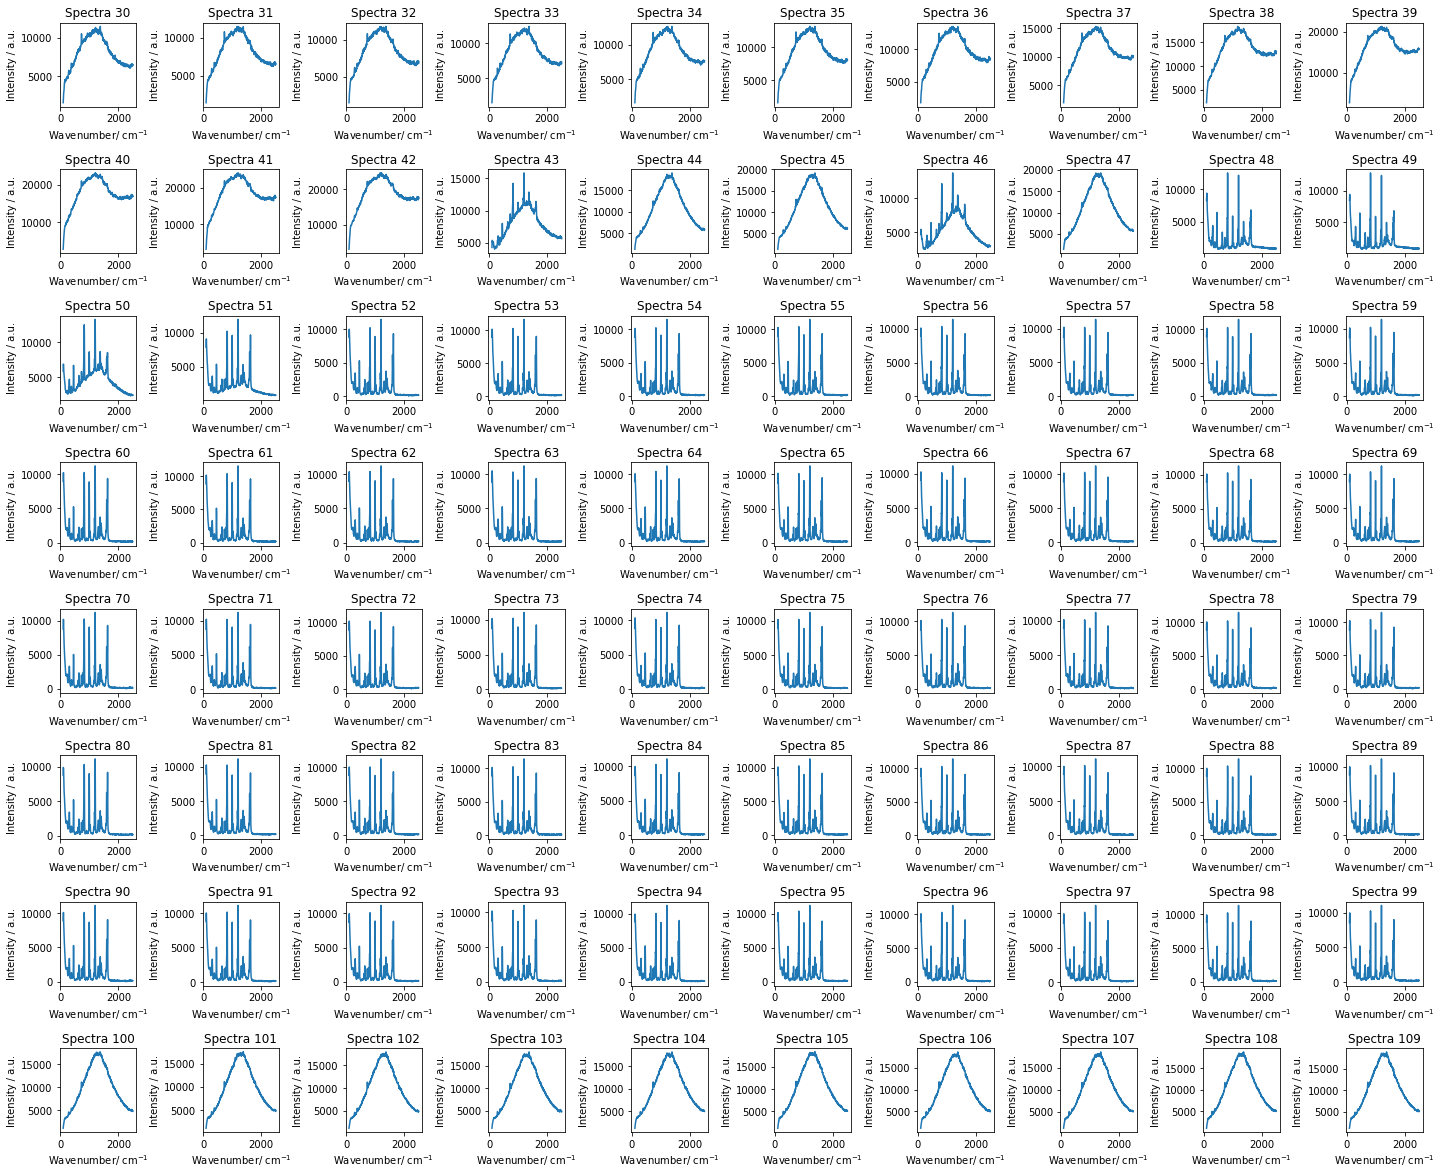

In [7]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(30, 110):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-29))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [8]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[75:94, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =19)
condition1_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
75,19,8955.0,9665.0,10191.0,9675.0,8765.0,8068.0,7279.0,6638.0,6238.0,...,162.0,141.0,193.0,181.0,142.0,174.0,187.0,168.0,131.0,128.0
76,19,8749.0,9887.0,10091.0,9634.0,8738.0,7897.0,7408.0,6674.0,5997.0,...,132.0,90.0,175.0,142.0,210.0,193.0,199.0,143.0,115.0,178.0
77,19,8960.0,9904.0,10176.0,9571.0,8900.0,8054.0,7217.0,6458.0,6094.0,...,136.0,128.0,182.0,144.0,197.0,74.0,203.0,131.0,112.0,103.0
78,19,8876.0,10028.0,10009.0,9536.0,8867.0,7911.0,7221.0,6500.0,6151.0,...,149.0,165.0,192.0,155.0,137.0,148.0,167.0,212.0,78.0,178.0
79,19,8864.0,9811.0,10217.0,9282.0,8756.0,7893.0,7122.0,6456.0,6111.0,...,97.0,108.0,173.0,127.0,164.0,148.0,166.0,114.0,141.0,146.0
80,19,8787.0,9911.0,9810.0,9709.0,8797.0,7898.0,7259.0,6430.0,6166.0,...,186.0,150.0,191.0,82.0,173.0,148.0,160.0,87.0,130.0,116.0
81,19,8958.0,10139.0,10279.0,9600.0,8815.0,7994.0,7503.0,6556.0,6049.0,...,125.0,117.0,140.0,157.0,115.0,135.0,192.0,145.0,97.0,153.0
82,19,8836.0,9844.0,10052.0,9613.0,8804.0,7851.0,7293.0,6571.0,6090.0,...,90.0,117.0,112.0,117.0,98.0,188.0,158.0,153.0,121.0,160.0
83,19,8892.0,9918.0,10136.0,9636.0,8934.0,7907.0,7041.0,6719.0,6232.0,...,110.0,85.0,201.0,134.0,208.0,120.0,165.0,108.0,115.0,87.0
84,19,8682.0,9690.0,9968.0,9778.0,8804.0,7892.0,7149.0,6713.0,5907.0,...,117.0,107.0,158.0,130.0,129.0,153.0,142.0,152.0,173.0,142.0


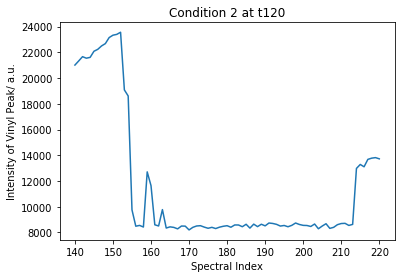

In [9]:
# Condition
df.loc[140:220,'1629.739312'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2 at t120')
plt.show()

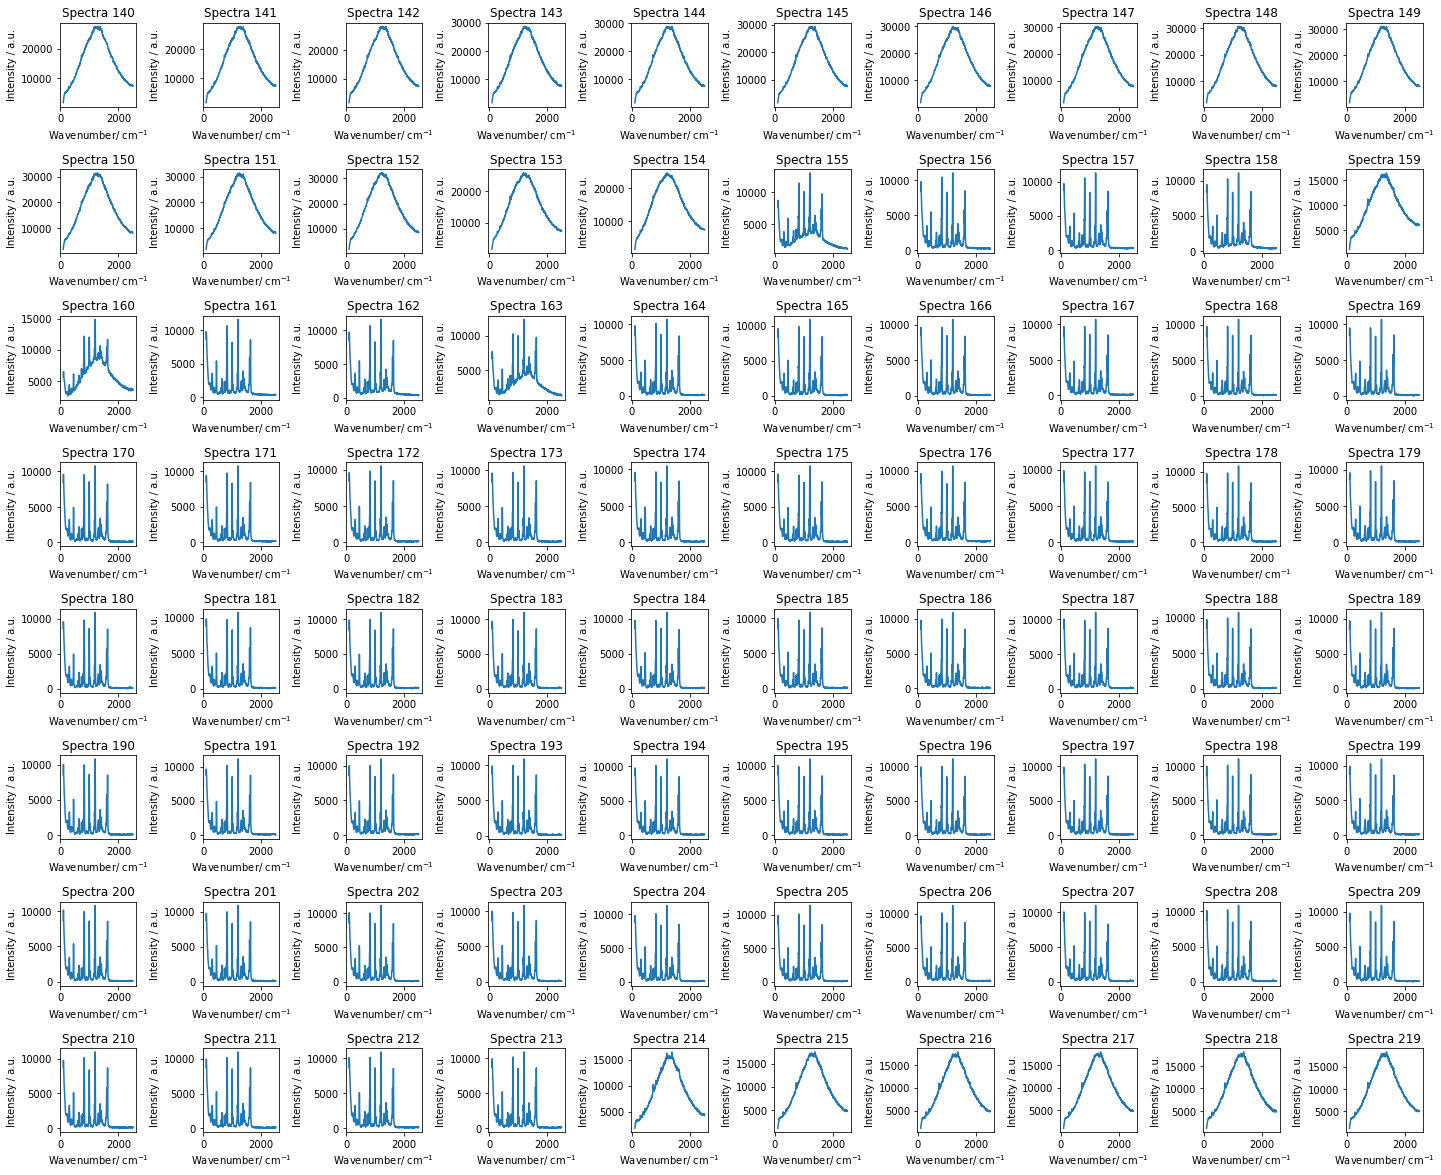

In [10]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(140, 220):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-139))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[190:209, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =20)
condition2_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
190,20,8563.0,9628.0,10031.0,9467.0,8579.0,7752.0,7001.0,6446.0,5967.0,...,137.0,76.0,117.0,166.0,130.0,103.0,169.0,109.0,94.0,118.0
191,20,8714.0,9636.0,9576.0,9141.0,8615.0,7979.0,6976.0,6402.0,5836.0,...,90.0,69.0,191.0,92.0,121.0,129.0,128.0,102.0,117.0,37.0
192,20,8600.0,9557.0,9950.0,9347.0,8447.0,7725.0,6794.0,6372.0,5937.0,...,137.0,106.0,174.0,78.0,110.0,137.0,146.0,122.0,160.0,132.0
193,20,8818.0,9537.0,9898.0,9386.0,8628.0,7649.0,7020.0,6485.0,5984.0,...,126.0,79.0,145.0,120.0,162.0,149.0,149.0,149.0,97.0,98.0
194,20,8704.0,9747.0,9707.0,9481.0,8538.0,7794.0,7056.0,6406.0,6045.0,...,104.0,126.0,150.0,113.0,161.0,86.0,125.0,88.0,122.0,97.0
195,20,8768.0,9748.0,10021.0,9321.0,8426.0,7989.0,7039.0,6502.0,6023.0,...,107.0,110.0,126.0,83.0,146.0,115.0,116.0,117.0,126.0,87.0
196,20,8664.0,9577.0,9915.0,9208.0,8453.0,7872.0,6950.0,6399.0,6110.0,...,106.0,109.0,161.0,148.0,178.0,97.0,172.0,85.0,93.0,87.0
197,20,8997.0,9806.0,9843.0,9397.0,8695.0,7918.0,6998.0,6409.0,6040.0,...,139.0,87.0,163.0,116.0,149.0,105.0,111.0,122.0,87.0,107.0
198,20,8650.0,9610.0,9944.0,9302.0,8552.0,7682.0,6945.0,6363.0,5991.0,...,90.0,107.0,139.0,61.0,121.0,112.0,133.0,125.0,88.0,128.0
199,20,8765.0,9605.0,9929.0,9541.0,8544.0,7759.0,7072.0,6441.0,5960.0,...,78.0,139.0,145.0,136.0,84.0,131.0,143.0,121.0,95.0,143.0


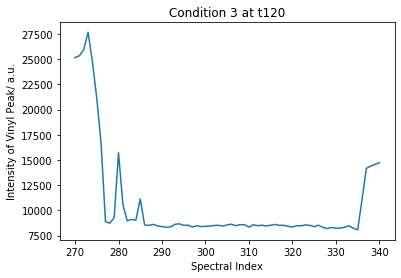

In [12]:
# Condition
df.loc[270:340,'1629.739312'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3 at t120')
plt.show()

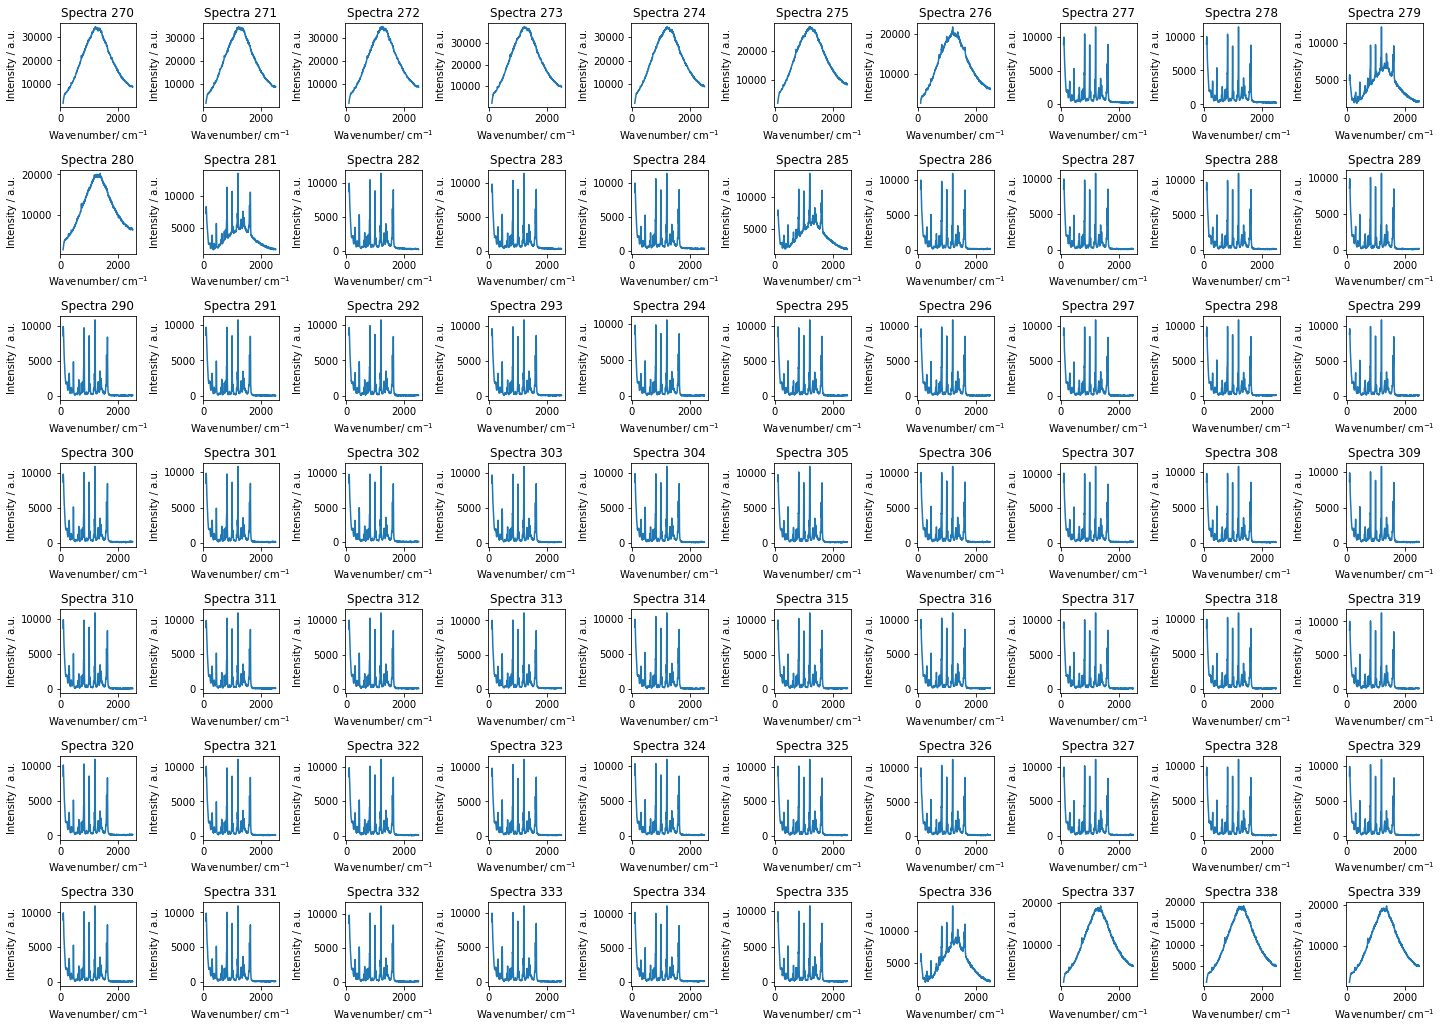

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(270, 340):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-269))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[310:329, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =21)
condition3_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
310,21,8673.0,9510.0,9904.0,9599.0,8591.0,7787.0,6981.0,6422.0,5940.0,...,95.0,96.0,146.0,133.0,82.0,74.0,162.0,114.0,138.0,128.0
311,21,8860.0,9597.0,9878.0,9534.0,8864.0,7731.0,7169.0,6336.0,6022.0,...,89.0,117.0,158.0,92.0,192.0,132.0,161.0,123.0,86.0,136.0
312,21,8712.0,9802.0,9989.0,9372.0,8612.0,7867.0,7112.0,6412.0,6085.0,...,121.0,69.0,159.0,112.0,122.0,92.0,162.0,141.0,59.0,93.0
313,21,8803.0,9814.0,10018.0,9497.0,8773.0,7799.0,7054.0,6427.0,6036.0,...,84.0,108.0,93.0,109.0,110.0,44.0,123.0,95.0,155.0,69.0
314,21,8778.0,9634.0,9878.0,9424.0,8544.0,7794.0,7075.0,6324.0,5954.0,...,71.0,92.0,120.0,123.0,112.0,135.0,158.0,100.0,77.0,92.0
315,21,8754.0,9771.0,10037.0,9323.0,8827.0,8009.0,7071.0,6404.0,5951.0,...,77.0,104.0,164.0,103.0,169.0,94.0,105.0,90.0,86.0,139.0
316,21,8757.0,9729.0,10015.0,9562.0,8569.0,7861.0,7081.0,6502.0,6044.0,...,71.0,94.0,167.0,117.0,143.0,132.0,186.0,96.0,79.0,136.0
317,21,8872.0,9708.0,9729.0,9272.0,8432.0,7750.0,7164.0,6250.0,6104.0,...,96.0,49.0,133.0,93.0,112.0,68.0,145.0,67.0,92.0,54.0
318,21,8701.0,9739.0,9888.0,9413.0,8595.0,7847.0,6931.0,6389.0,6118.0,...,89.0,152.0,190.0,125.0,181.0,65.0,150.0,80.0,138.0,102.0
319,21,8717.0,9846.0,10023.0,9579.0,8570.0,7789.0,7193.0,6454.0,6030.0,...,91.0,101.0,113.0,127.0,141.0,88.0,151.0,147.0,81.0,125.0


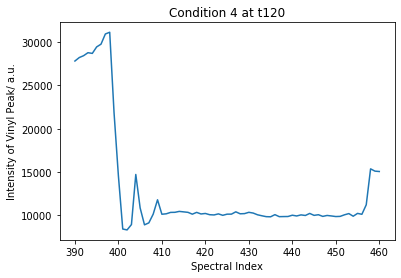

In [15]:
# Condition
df.loc[390:460,'1629.739312'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4 at t120')
plt.show()

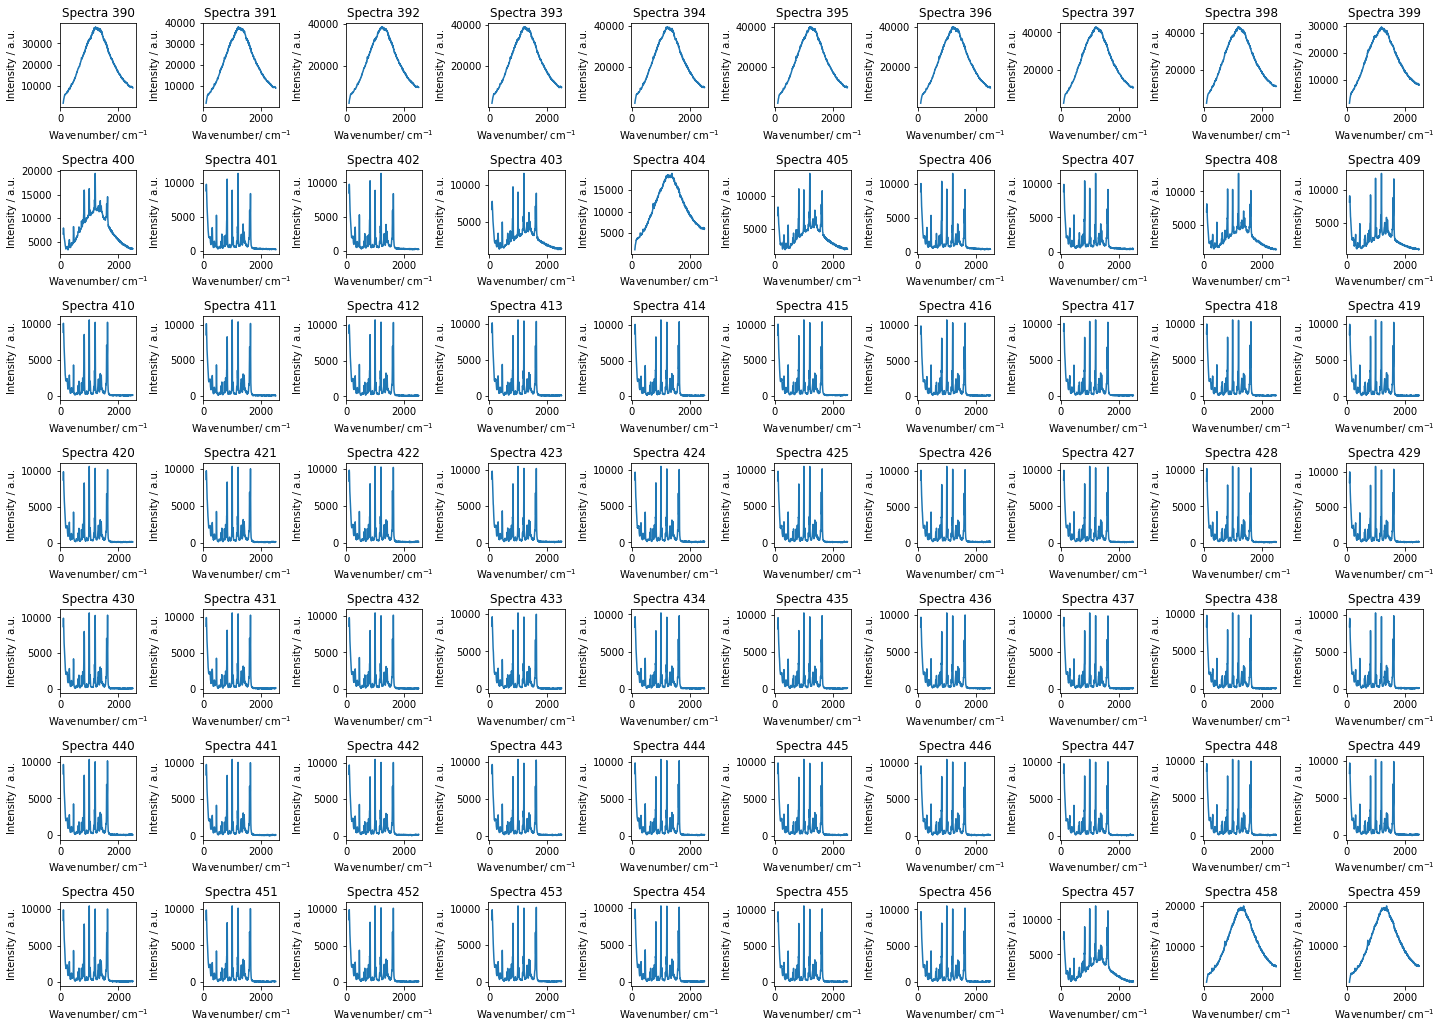

In [16]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(390, 460):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-389))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[430:449, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =22)
condition4_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
430,22,8728.0,9658.0,9901.0,9514.0,8801.0,7834.0,7198.0,6453.0,6108.0,...,169.0,94.0,136.0,106.0,168.0,139.0,184.0,123.0,107.0,129.0
431,22,8709.0,9535.0,9900.0,9520.0,8687.0,7883.0,7343.0,6659.0,6283.0,...,112.0,78.0,175.0,115.0,154.0,125.0,208.0,101.0,96.0,144.0
432,22,8573.0,9433.0,9738.0,9488.0,8564.0,7706.0,7006.0,6557.0,6075.0,...,103.0,-4.0,152.0,97.0,147.0,67.0,141.0,112.0,137.0,126.0
433,22,8366.0,9370.0,9591.0,9114.0,8235.0,7578.0,6846.0,6419.0,5846.0,...,86.0,144.0,140.0,93.0,145.0,82.0,165.0,62.0,89.0,140.0
434,22,8308.0,9198.0,9690.0,8985.0,8328.0,7482.0,6862.0,6377.0,5886.0,...,133.0,102.0,162.0,176.0,130.0,114.0,154.0,91.0,125.0,77.0
435,22,8127.0,9123.0,9603.0,9128.0,8299.0,7466.0,6829.0,6348.0,5867.0,...,71.0,138.0,107.0,92.0,144.0,92.0,142.0,102.0,97.0,129.0
436,22,8448.0,9325.0,9747.0,9052.0,8461.0,7640.0,6905.0,6394.0,5798.0,...,116.0,36.0,149.0,61.0,147.0,82.0,148.0,87.0,128.0,98.0
437,22,8548.0,9450.0,9633.0,9091.0,8434.0,7629.0,6860.0,6251.0,5878.0,...,97.0,72.0,193.0,81.0,178.0,109.0,143.0,116.0,123.0,114.0
438,22,8289.0,9217.0,9777.0,9286.0,8337.0,7676.0,6915.0,6282.0,5870.0,...,71.0,70.0,182.0,49.0,130.0,119.0,152.0,91.0,89.0,95.0
439,22,8441.0,9404.0,9576.0,9337.0,8285.0,7690.0,6882.0,6259.0,5930.0,...,139.0,78.0,144.0,138.0,154.0,85.0,139.0,110.0,96.0,121.0


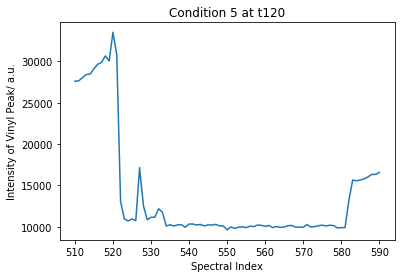

In [18]:
# Condition
df.loc[510:590,'1629.739312'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5 at t120')
plt.show()

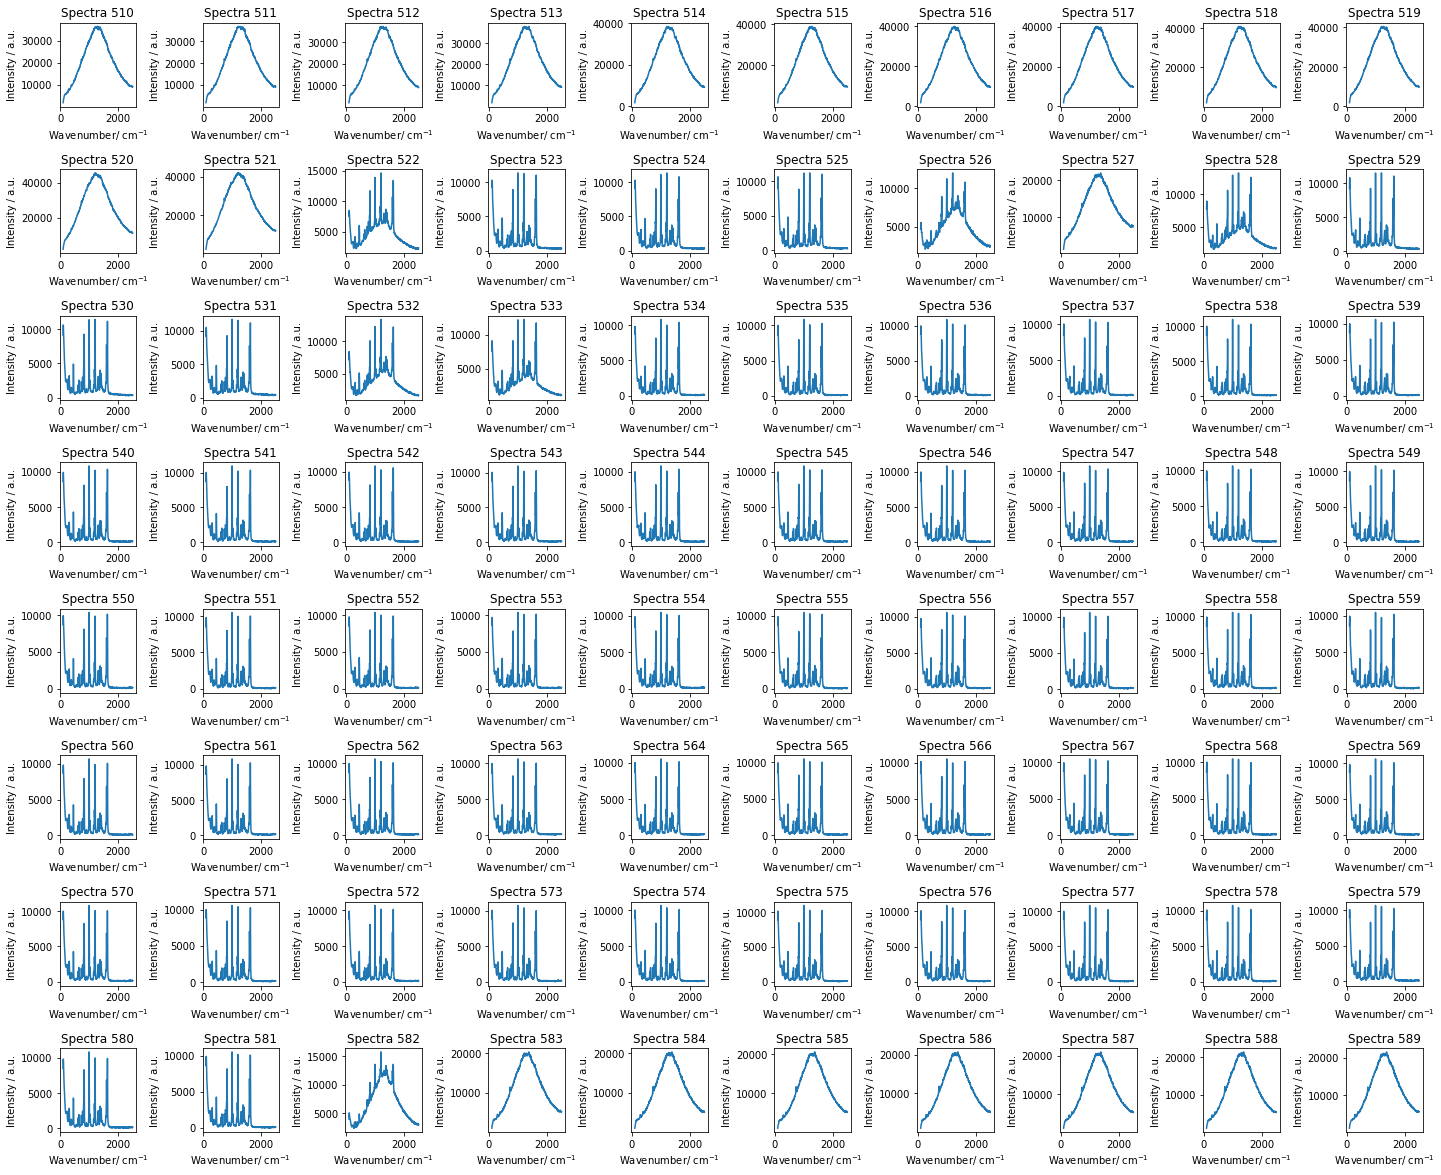

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(510, 590):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-509))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[560:579, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =23)
condition5_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
560,23,8701.0,9640.0,9809.0,9329.0,8676.0,7904.0,7020.0,6518.0,6174.0,...,61.0,113.0,170.0,157.0,163.0,146.0,126.0,67.0,94.0,66.0
561,23,8633.0,9809.0,9773.0,9314.0,8707.0,7843.0,7300.0,6567.0,6088.0,...,82.0,91.0,126.0,131.0,120.0,130.0,163.0,110.0,116.0,149.0
562,23,8726.0,9770.0,9958.0,9570.0,8541.0,7961.0,7273.0,6465.0,6181.0,...,72.0,85.0,141.0,104.0,146.0,92.0,138.0,113.0,131.0,139.0
563,23,8648.0,9540.0,9986.0,9553.0,8729.0,7782.0,7065.0,6491.0,6015.0,...,76.0,86.0,133.0,107.0,141.0,150.0,116.0,101.0,118.0,95.0
564,23,8730.0,9507.0,10026.0,9291.0,8569.0,7907.0,7096.0,6551.0,6082.0,...,91.0,111.0,139.0,86.0,131.0,127.0,110.0,110.0,125.0,132.0
565,23,8618.0,9591.0,9946.0,9487.0,8708.0,7797.0,7224.0,6621.0,6194.0,...,72.0,96.0,134.0,85.0,172.0,122.0,218.0,91.0,90.0,120.0
566,23,8582.0,9934.0,10156.0,9458.0,8817.0,8058.0,7049.0,6421.0,6111.0,...,104.0,58.0,111.0,81.0,176.0,79.0,151.0,91.0,92.0,107.0
567,23,8772.0,9563.0,9902.0,9712.0,8914.0,7913.0,7184.0,6438.0,6150.0,...,108.0,105.0,164.0,125.0,107.0,151.0,155.0,85.0,60.0,109.0
568,23,8651.0,9600.0,10036.0,9309.0,8698.0,8011.0,7160.0,6674.0,6149.0,...,84.0,89.0,131.0,92.0,134.0,86.0,177.0,36.0,92.0,77.0
569,23,8757.0,9631.0,9833.0,9493.0,8785.0,7939.0,7183.0,6595.0,6186.0,...,107.0,43.0,194.0,63.0,147.0,92.0,147.0,102.0,128.0,109.0


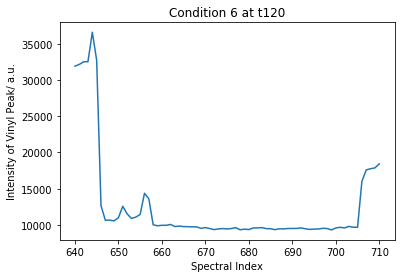

In [21]:
# Condition
df.loc[640:710,'1629.739312'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6 at t120')
plt.show()

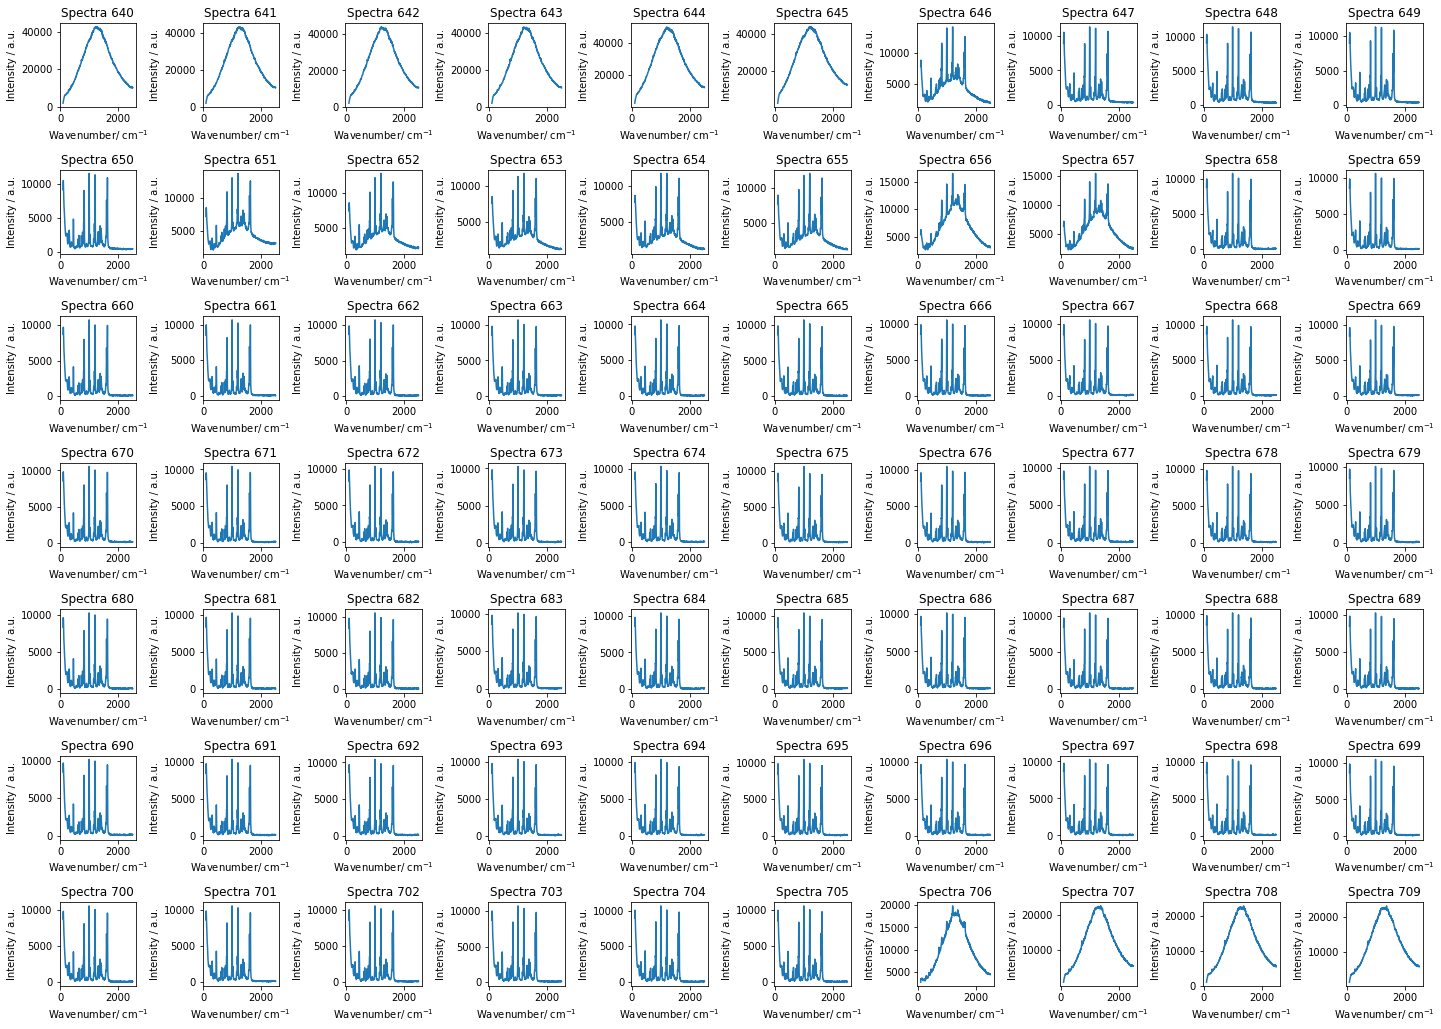

In [22]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(640, 710):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-639))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[680:699, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =24)
condition6_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
680,24,8351.0,9583.0,9620.0,9342.0,8374.0,7527.0,6827.0,6361.0,5870.0,...,68.0,89.0,160.0,73.0,139.0,79.0,106.0,122.0,73.0,75.0
681,24,8404.0,9342.0,9707.0,9270.0,8420.0,7674.0,7128.0,6473.0,5922.0,...,63.0,107.0,186.0,97.0,131.0,161.0,197.0,119.0,95.0,66.0
682,24,8411.0,9733.0,9750.0,9181.0,8404.0,7850.0,6867.0,6399.0,6055.0,...,132.0,75.0,184.0,67.0,165.0,114.0,170.0,85.0,74.0,49.0
683,24,8612.0,9744.0,9784.0,9453.0,8518.0,7668.0,6967.0,6402.0,5890.0,...,87.0,94.0,131.0,70.0,112.0,77.0,132.0,68.0,90.0,152.0
684,24,8606.0,9506.0,9772.0,9502.0,8693.0,7763.0,6989.0,6520.0,6061.0,...,106.0,96.0,146.0,91.0,168.0,83.0,162.0,76.0,89.0,141.0
685,24,8462.0,9686.0,9744.0,9047.0,8498.0,7760.0,7020.0,6487.0,5834.0,...,148.0,89.0,113.0,89.0,167.0,113.0,129.0,68.0,59.0,111.0
686,24,8542.0,9661.0,9627.0,9366.0,8305.0,7650.0,7148.0,6413.0,5901.0,...,115.0,89.0,128.0,115.0,119.0,111.0,146.0,108.0,79.0,81.0
687,24,8450.0,9412.0,9653.0,9190.0,8401.0,7747.0,7072.0,6253.0,5921.0,...,117.0,139.0,152.0,110.0,137.0,103.0,78.0,135.0,79.0,109.0
688,24,8626.0,9596.0,9841.0,9303.0,8597.0,7602.0,6877.0,6203.0,6073.0,...,127.0,38.0,131.0,120.0,124.0,98.0,88.0,75.0,91.0,121.0
689,24,8484.0,9483.0,9828.0,9368.0,8579.0,7837.0,6988.0,6345.0,6019.0,...,55.0,86.0,171.0,94.0,124.0,118.0,118.0,133.0,109.0,73.0


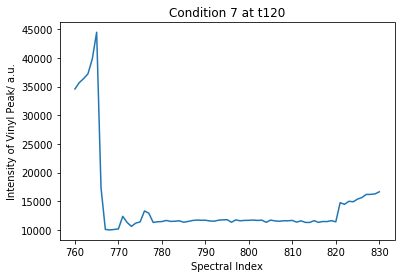

In [24]:
# Condition
df.loc[760:830,'1629.739312'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7 at t120')
plt.show()

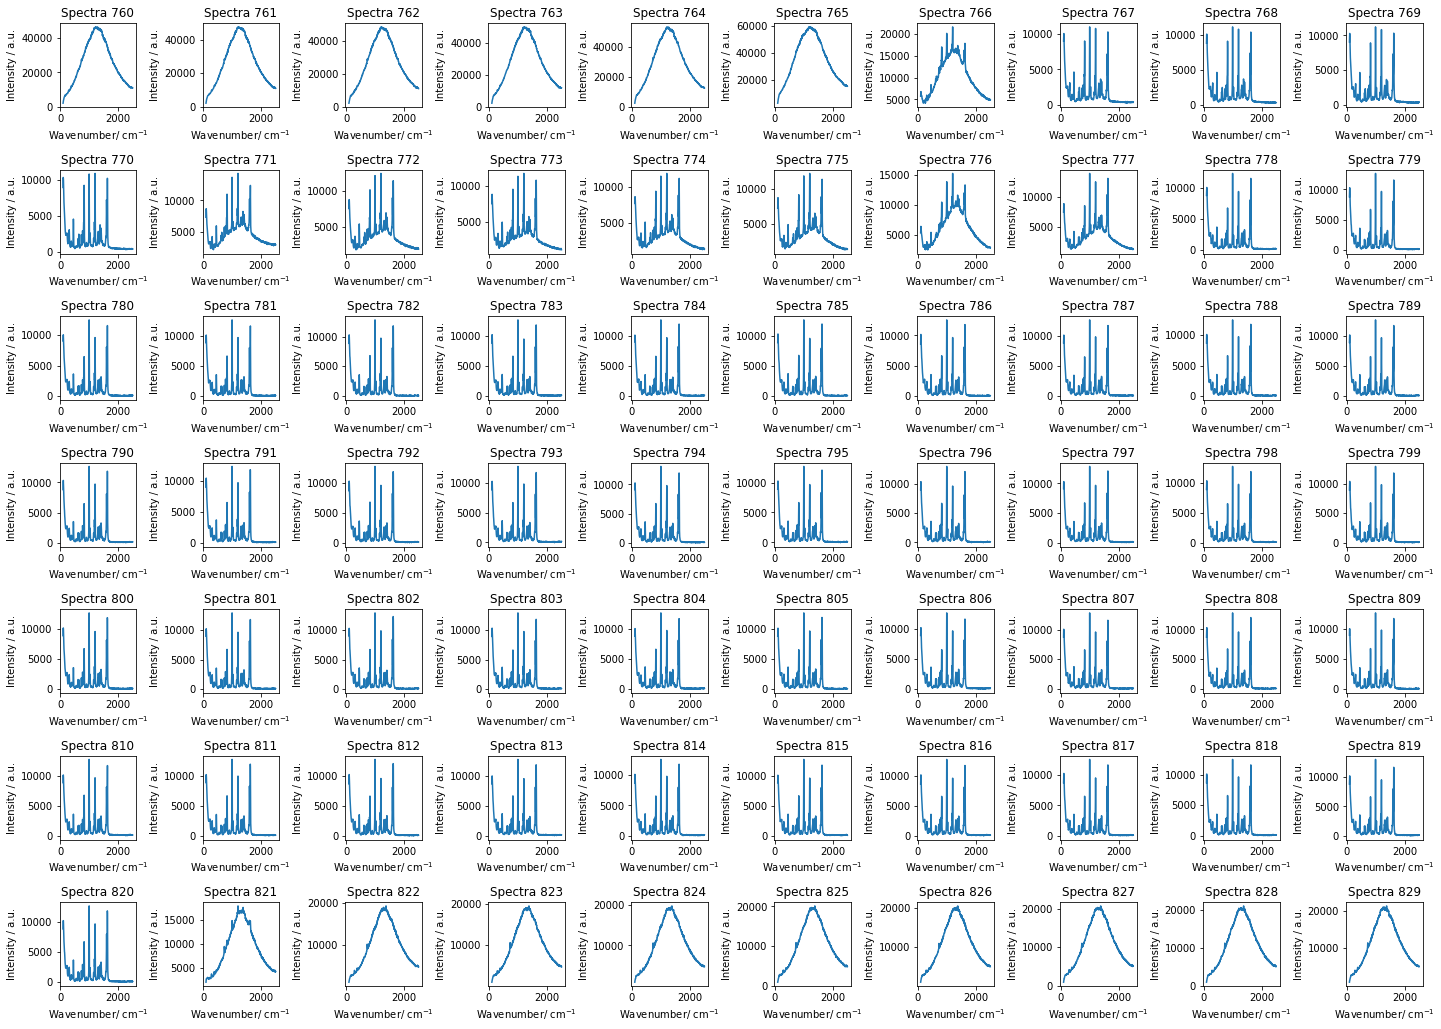

In [25]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(760, 830):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-759))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[800:819, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =25)
condition7_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
800,25,8945.0,10118.0,10236.0,9930.0,9046.0,8339.0,7438.0,6739.0,6472.0,...,79.0,121.0,141.0,93.0,153.0,150.0,111.0,38.0,105.0,130.0
801,25,8966.0,9871.0,10226.0,9880.0,9193.0,8367.0,7519.0,6767.0,6334.0,...,98.0,118.0,135.0,70.0,113.0,53.0,129.0,110.0,92.0,93.0
802,25,8980.0,10216.0,10238.0,10021.0,9114.0,8379.0,7495.0,6772.0,6536.0,...,138.0,121.0,177.0,85.0,137.0,96.0,174.0,90.0,89.0,132.0
803,25,8912.0,10070.0,10307.0,9957.0,9283.0,8441.0,7623.0,6931.0,6471.0,...,103.0,129.0,146.0,106.0,116.0,135.0,129.0,101.0,127.0,96.0
804,25,8883.0,9980.0,10126.0,9763.0,9015.0,8339.0,7479.0,6625.0,6326.0,...,103.0,109.0,171.0,103.0,147.0,119.0,151.0,122.0,82.0,110.0
805,25,8823.0,9843.0,10125.0,9685.0,9096.0,8194.0,7344.0,6809.0,6537.0,...,104.0,96.0,157.0,69.0,129.0,126.0,115.0,119.0,103.0,91.0
806,25,8949.0,10015.0,10237.0,9907.0,8970.0,8023.0,7428.0,6861.0,6508.0,...,87.0,89.0,159.0,93.0,173.0,108.0,81.0,107.0,55.0,120.0
807,25,8752.0,10060.0,10051.0,9846.0,8717.0,8217.0,7499.0,6863.0,6422.0,...,86.0,75.0,136.0,78.0,142.0,80.0,78.0,126.0,55.0,97.0
808,25,8701.0,9983.0,10295.0,9953.0,8952.0,8383.0,7513.0,6968.0,6450.0,...,76.0,131.0,158.0,118.0,131.0,117.0,165.0,140.0,120.0,111.0
809,25,8954.0,9982.0,10027.0,9521.0,9004.0,8101.0,7363.0,6855.0,6324.0,...,117.0,98.0,134.0,107.0,178.0,92.0,125.0,135.0,111.0,99.0


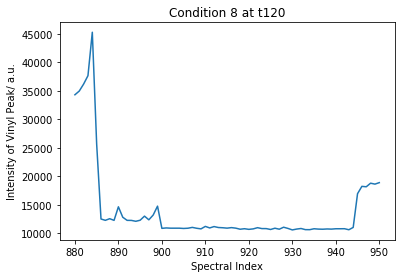

In [27]:
# Condition
df.loc[880:950,'1629.739312'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8 at t120')
plt.show()

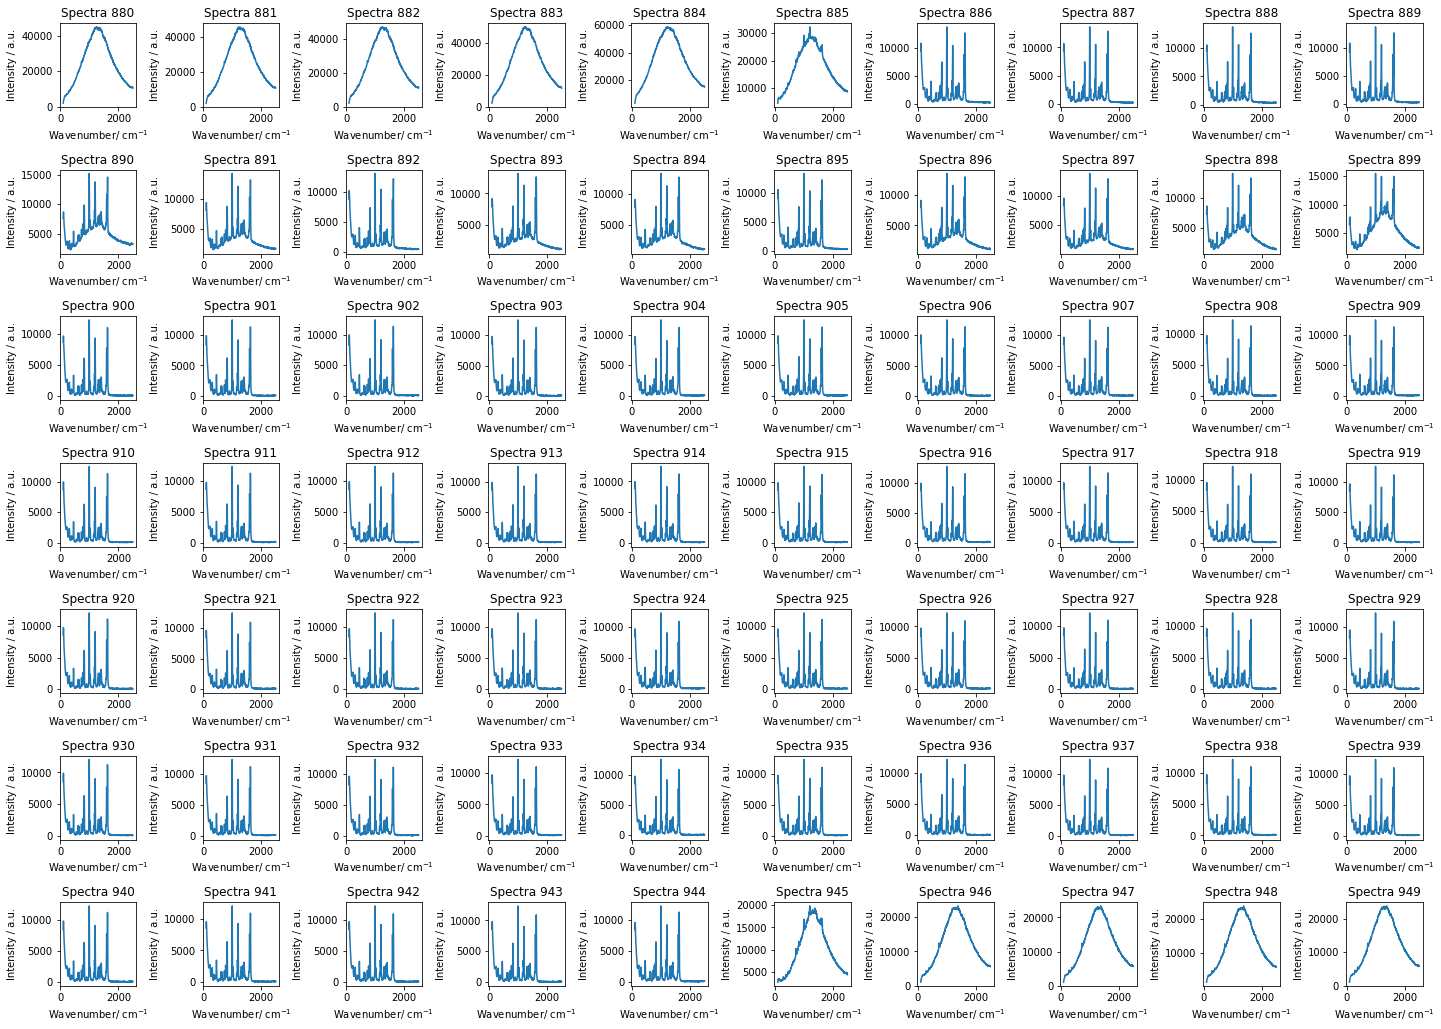

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(880, 950):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-879))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[920:939, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =26)
condition8_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
920,26,8591.0,9329.0,9712.0,9344.0,8555.0,7685.0,7123.0,6232.0,6085.0,...,114.0,101.0,144.0,106.0,108.0,119.0,97.0,66.0,117.0,54.0
921,26,8456.0,9582.0,9652.0,9200.0,8456.0,7791.0,6912.0,6455.0,6193.0,...,90.0,108.0,147.0,108.0,134.0,88.0,103.0,43.0,95.0,78.0
922,26,8392.0,9075.0,9670.0,9290.0,8651.0,7922.0,7145.0,6525.0,5999.0,...,49.0,61.0,106.0,86.0,125.0,104.0,118.0,81.0,96.0,107.0
923,26,8309.0,9306.0,9686.0,9103.0,8726.0,7772.0,7027.0,6548.0,6222.0,...,78.0,98.0,117.0,45.0,142.0,96.0,93.0,24.0,48.0,79.0
924,26,8394.0,9599.0,9661.0,9296.0,8560.0,7861.0,7049.0,6350.0,6103.0,...,106.0,108.0,155.0,111.0,138.0,133.0,167.0,116.0,136.0,83.0
925,26,8457.0,9491.0,9584.0,9108.0,8737.0,7878.0,7094.0,6527.0,5950.0,...,78.0,97.0,121.0,98.0,158.0,108.0,119.0,52.0,85.0,81.0
926,26,8465.0,9539.0,9738.0,9245.0,8544.0,7851.0,7168.0,6449.0,6105.0,...,78.0,75.0,157.0,111.0,121.0,115.0,178.0,123.0,98.0,49.0
927,26,8521.0,9480.0,9667.0,9353.0,8507.0,7760.0,7183.0,6461.0,6141.0,...,87.0,79.0,129.0,114.0,201.0,133.0,116.0,106.0,107.0,50.0
928,26,8446.0,9547.0,9633.0,9465.0,8680.0,7874.0,7273.0,6545.0,6102.0,...,66.0,71.0,150.0,104.0,129.0,122.0,145.0,96.0,93.0,64.0
929,26,8354.0,9515.0,9570.0,9299.0,8626.0,7961.0,6968.0,6527.0,6042.0,...,87.0,60.0,91.0,113.0,143.0,108.0,133.0,110.0,47.0,80.0


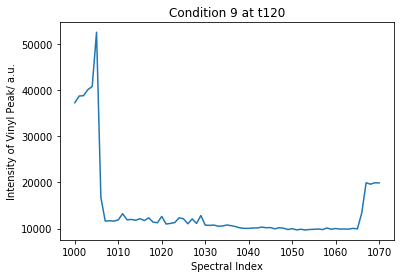

In [30]:
# Condition
df.loc[1000:1070,'1629.739312'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9 at t120')
plt.show()

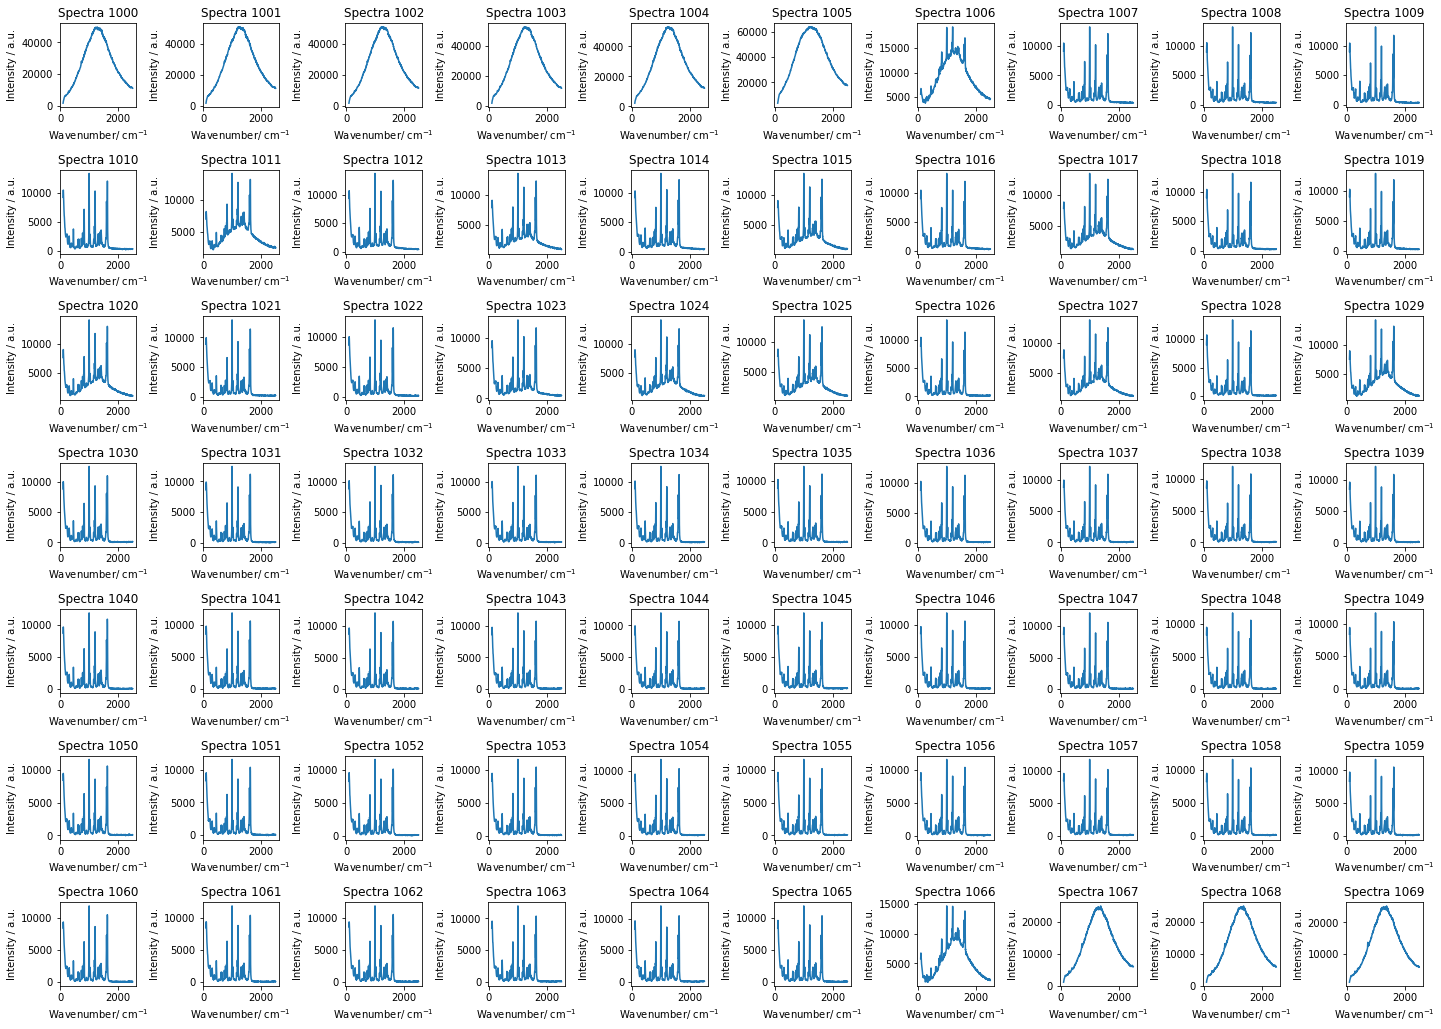

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(1000, 1070):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-999))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[1040:1059, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =27)
condition9_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
1040,27,8708.0,9516.0,9663.0,9354.0,8589.0,7852.0,7283.0,6431.0,6098.0,...,116.0,108.0,140.0,119.0,123.0,116.0,125.0,84.0,42.0,82.0
1041,27,8607.0,9775.0,9851.0,9385.0,8810.0,7802.0,6962.0,6418.0,6057.0,...,90.0,79.0,99.0,57.0,71.0,108.0,104.0,45.0,80.0,47.0
1042,27,8731.0,9541.0,9682.0,9492.0,8656.0,7621.0,7055.0,6531.0,6129.0,...,45.0,59.0,105.0,45.0,107.0,98.0,118.0,51.0,53.0,60.0
1043,27,8623.0,9513.0,9771.0,9368.0,8652.0,7768.0,7112.0,6544.0,6271.0,...,92.0,115.0,174.0,95.0,98.0,111.0,141.0,110.0,50.0,130.0
1044,27,8556.0,9623.0,9931.0,9427.0,8724.0,7790.0,7120.0,6669.0,6042.0,...,88.0,56.0,136.0,125.0,167.0,88.0,154.0,70.0,84.0,98.0
1045,27,8662.0,9537.0,9814.0,9340.0,8554.0,7731.0,6963.0,6479.0,6105.0,...,112.0,53.0,125.0,96.0,108.0,42.0,81.0,79.0,68.0,84.0
1046,27,8659.0,9354.0,9706.0,9211.0,8685.0,7819.0,6879.0,6433.0,6130.0,...,79.0,74.0,137.0,110.0,138.0,87.0,149.0,73.0,85.0,63.0
1047,27,8738.0,9488.0,9815.0,9425.0,8499.0,7850.0,7056.0,6552.0,6074.0,...,83.0,45.0,134.0,136.0,87.0,136.0,98.0,84.0,71.0,63.0
1048,27,8345.0,9471.0,9436.0,9227.0,8499.0,7743.0,7112.0,6333.0,6130.0,...,118.0,87.0,169.0,106.0,123.0,112.0,98.0,56.0,101.0,83.0
1049,27,8366.0,9264.0,9385.0,8958.0,8114.0,7522.0,6825.0,6394.0,6056.0,...,68.0,93.0,130.0,87.0,114.0,55.0,77.0,89.0,62.0,83.0


In [33]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
75,19,8955.0,9665.0,10191.0,9675.0,8765.0,8068.0,7279.0,6638.0,6238.0,...,162.0,141.0,193.0,181.0,142.0,174.0,187.0,168.0,131.0,128.0
76,19,8749.0,9887.0,10091.0,9634.0,8738.0,7897.0,7408.0,6674.0,5997.0,...,132.0,90.0,175.0,142.0,210.0,193.0,199.0,143.0,115.0,178.0
77,19,8960.0,9904.0,10176.0,9571.0,8900.0,8054.0,7217.0,6458.0,6094.0,...,136.0,128.0,182.0,144.0,197.0,74.0,203.0,131.0,112.0,103.0
78,19,8876.0,10028.0,10009.0,9536.0,8867.0,7911.0,7221.0,6500.0,6151.0,...,149.0,165.0,192.0,155.0,137.0,148.0,167.0,212.0,78.0,178.0
79,19,8864.0,9811.0,10217.0,9282.0,8756.0,7893.0,7122.0,6456.0,6111.0,...,97.0,108.0,173.0,127.0,164.0,148.0,166.0,114.0,141.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,27,8410.0,9351.0,9688.0,9114.0,8499.0,7604.0,6833.0,6305.0,5886.0,...,93.0,66.0,103.0,86.0,66.0,87.0,88.0,97.0,80.0,84.0
1056,27,8444.0,9304.0,9525.0,9187.0,8053.0,7594.0,6901.0,6351.0,5981.0,...,107.0,95.0,151.0,59.0,136.0,50.0,125.0,124.0,60.0,69.0
1057,27,8506.0,9186.0,9601.0,9056.0,8387.0,7496.0,6875.0,6411.0,5992.0,...,85.0,87.0,93.0,66.0,130.0,79.0,151.0,54.0,54.0,82.0
1058,27,8271.0,9390.0,9521.0,9144.0,8419.0,7758.0,7078.0,6325.0,6033.0,...,82.0,69.0,148.0,63.0,111.0,56.0,137.0,65.0,40.0,51.0


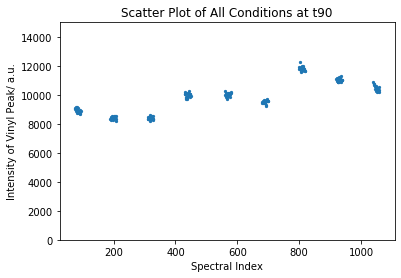

In [34]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t90')
plt.ylim(0, 15000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [35]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [36]:
# Inspect df_.
df_

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
75,19,8955.0,9665.0,10191.0,9675.0,8765.0,8068.0,7279.0,6638.0,6238.0,...,162.0,141.0,193.0,181.0,142.0,174.0,187.0,168.0,131.0,128.0
76,19,8749.0,9887.0,10091.0,9634.0,8738.0,7897.0,7408.0,6674.0,5997.0,...,132.0,90.0,175.0,142.0,210.0,193.0,199.0,143.0,115.0,178.0
77,19,8960.0,9904.0,10176.0,9571.0,8900.0,8054.0,7217.0,6458.0,6094.0,...,136.0,128.0,182.0,144.0,197.0,74.0,203.0,131.0,112.0,103.0
78,19,8876.0,10028.0,10009.0,9536.0,8867.0,7911.0,7221.0,6500.0,6151.0,...,149.0,165.0,192.0,155.0,137.0,148.0,167.0,212.0,78.0,178.0
79,19,8864.0,9811.0,10217.0,9282.0,8756.0,7893.0,7122.0,6456.0,6111.0,...,97.0,108.0,173.0,127.0,164.0,148.0,166.0,114.0,141.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,27,8410.0,9351.0,9688.0,9114.0,8499.0,7604.0,6833.0,6305.0,5886.0,...,93.0,66.0,103.0,86.0,66.0,87.0,88.0,97.0,80.0,84.0
1056,27,8444.0,9304.0,9525.0,9187.0,8053.0,7594.0,6901.0,6351.0,5981.0,...,107.0,95.0,151.0,59.0,136.0,50.0,125.0,124.0,60.0,69.0
1057,27,8506.0,9186.0,9601.0,9056.0,8387.0,7496.0,6875.0,6411.0,5992.0,...,85.0,87.0,93.0,66.0,130.0,79.0,151.0,54.0,54.0,82.0
1058,27,8271.0,9390.0,9521.0,9144.0,8419.0,7758.0,7078.0,6325.0,6033.0,...,82.0,69.0,148.0,63.0,111.0,56.0,137.0,65.0,40.0,51.0


In [37]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.739312']].groupby('Condition').describe()

1629.739312                                                    \
                count      mean         std      min       25%      50%   
Condition                                                                 
19               20.0   9108.90  145.003775   8856.0   9036.25   9102.5   
20               20.0   8549.55  126.420966   8289.0   8490.25   8548.5   
21               20.0   8447.45  107.277052   8190.0   8368.25   8476.5   
22               20.0   9977.40  145.155235   9808.0   9851.75   9962.0   
23               20.0  10063.40  113.892562   9876.0   9970.75  10054.0   
24               20.0   9471.50   85.471756   9304.0   9426.25   9476.0   
25               20.0  11563.70  145.235960  11332.0  11459.75  11615.0   
26               20.0  10766.15  116.835591  10584.0  10701.00  10742.5   
27               20.0   9979.20  184.916368   9709.0   9829.75   9959.5   

                              
                75%      max  
Condition                     
19          9201.25   9352.0  
20          8637.50   8736.0  
21          8523.50   8601.0  
22         10042.00  10326.0  
23         10156.75  10275.0  
24          9511.50   9624.0  
25         11679.00  11747.0  
26         10821.75  11059.0  
27         10131.00  10321.0

In [38]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201022 High Throughput Experiment Conditions 19 to 27\Online Raman\df_t120.csv')